In [1]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance, test_acc
from dataset import get_loader, dataset_mean, dataset_std
from custom_resnet import nn, S10Model
from torchsummary import summary
from torch_lr_finder import LRFinder

/Users/piyushgrover/Workspace/erav1/s10erav1/utils.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


CUDA Available? False


In [2]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = get_loader(**kwargs)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


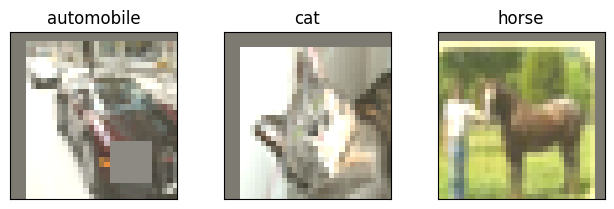

In [15]:
plot_dataset_sample(train_loader, dataset_mean, dataset_std)

In [4]:
device = torch.device("cuda" if cuda else "cpu")
model = S10Model(64, norm='bn').to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         Dropout2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
         Dropout2d-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
        Dropout2d-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,584
      BatchNorm2d-14          [-1, 128,

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.20E-04


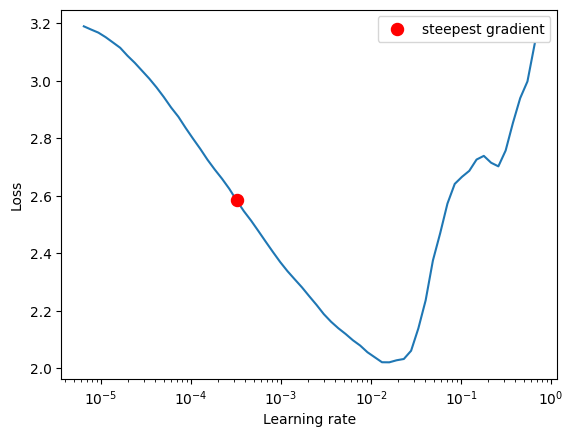

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [10]:
optimizer = optim.Adam(model.parameters(), lr=1e-6, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
num_epochs = 24
steps_per_epoch = len(train_loader)
#scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=3.20E-06, max_lr=3.20E-04, step_size_up=5*steps_per_epoch, step_size_down=19*steps_per_epoch, cycle_momentum=False, verbose=False)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, 
                                          max_lr=3.20E-04,
                                          epochs=num_epochs, 
                                          steps_per_epoch=steps_per_epoch, 
                                          pct_start=5/num_epochs, 
                                          div_factor=100, 
                                          final_div_factor=100,
                                          three_phase=False, 
                                          verbose=False
                                         )
                                          

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch} LR {scheduler.get_last_lr()}')
  train(model, device, train_loader, optimizer, criterion, scheduler)
  test(model, device, test_loader, criterion)

Epoch 1 LR [3.2e-06]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.4072, Accuracy: 4903/10000 (49.03%)

Epoch 2 LR [6.656000000000011e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.1207, Accuracy: 5979/10000 (59.79%)

Epoch 3 LR [0.0001299199999999999]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.9486, Accuracy: 6603/10000 (66.03%)

Epoch 4 LR [0.00019328]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.7799, Accuracy: 7267/10000 (72.67%)

Epoch 5 LR [0.0002566400000000001]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.7548, Accuracy: 7336/10000 (73.36%)

Epoch 6 LR [0.00031999999999999986]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6213, Accuracy: 7901/10000 (79.01%)

Epoch 7 LR [0.0003033263157894737]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6122, Accuracy: 7897/10000 (78.97%)

Epoch 8 LR [0.0002866526315789474]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.5619, Accuracy: 8130/10000 (81.30%)

Epoch 9 LR [0.0002699789473684211]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4941, Accuracy: 8326/10000 (83.26%)

Epoch 10 LR [0.0002533052631578948]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4339, Accuracy: 8541/10000 (85.41%)

Epoch 11 LR [0.0002366315789473684]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4452, Accuracy: 8496/10000 (84.96%)

Epoch 12 LR [0.00021995789473684213]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4931, Accuracy: 8367/10000 (83.67%)

Epoch 13 LR [0.0002032842105263158]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4949, Accuracy: 8346/10000 (83.46%)

Epoch 14 LR [0.00018661052631578954]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3910, Accuracy: 8699/10000 (86.99%)

Epoch 15 LR [0.0001699368421052631]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4118, Accuracy: 8601/10000 (86.01%)

Epoch 16 LR [0.00015326315789473684]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4488, Accuracy: 8537/10000 (85.37%)

Epoch 17 LR [0.0001365894736842106]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3487, Accuracy: 8860/10000 (88.60%)

Epoch 18 LR [0.00011991578947368415]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3302, Accuracy: 8902/10000 (89.02%)

Epoch 19 LR [0.0001032421052631579]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3080, Accuracy: 8962/10000 (89.62%)

Epoch 20 LR [8.656842105263165e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3482, Accuracy: 8859/10000 (88.59%)

Epoch 21 LR [6.98947368421052e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.2918, Accuracy: 9047/10000 (90.47%)

Epoch 22 LR [5.3221052631578956e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.2971, Accuracy: 9041/10000 (90.41%)

Epoch 23 LR [3.6547368421052686e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.2621, Accuracy: 9159/10000 (91.59%)

Epoch 24 LR [1.9873684210526257e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.2544, Accuracy: 9170/10000 (91.70%)



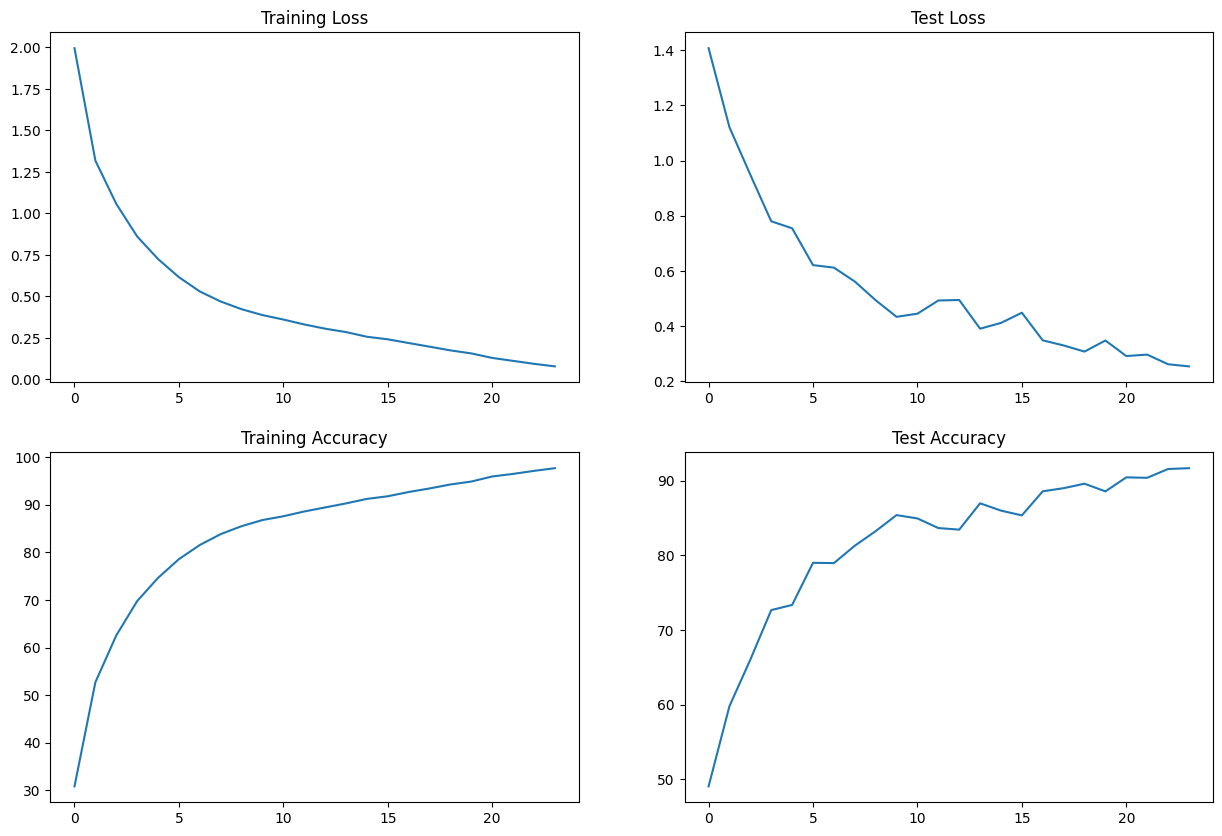

In [11]:
plot_model_performance()